# Importing Libraries

In [1]:
%pip install numpy matplotlib tensorflow keras
%pip install --upgrade tensorflow keras

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [3]:
# Define the directory path
directory_path = './valid'

# Create the dataset
validation_set = tf.keras.utils.image_dataset_from_directory(
    directory_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

# Get the class names
class_names = validation_set.class_names
print(class_names)

cnn = tf.keras.models.load_model('./trained_plant_disease_model.h5')

Found 38 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-s

# Loading Model

#Visualising and Performing Prediction on Single image

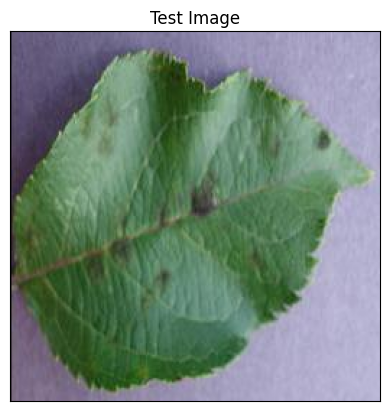

In [4]:
import cv2
import matplotlib.pyplot as plt  # Add this line for Matplotlib

image_path = r'./valid/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335_270deg.jpg'

# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


## Testing Model

In [5]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [6]:
print(predictions)


[[9.9999988e-01 1.4259061e-10 4.0114571e-11 2.9553154e-10 6.6909206e-14
  3.3127310e-15 1.3989686e-15 2.2107559e-12 5.9613274e-16 5.3929983e-13
  2.6152992e-18 1.5231028e-15 1.7125970e-20 8.7237188e-16 6.9045980e-12
  1.2608537e-14 3.0767233e-11 4.0220039e-16 9.3453554e-13 2.1692855e-13
  3.4124259e-10 1.3984872e-07 2.8886537e-12 5.0163629e-15 4.1949590e-15
  1.5235583e-12 4.0324181e-13 2.9254890e-11 1.9964049e-13 2.1020113e-12
  5.7805228e-14 6.3859461e-14 1.6855912e-10 6.9534498e-18 7.8435163e-14
  2.4001505e-20 7.3536191e-17 1.8855222e-15]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)


0


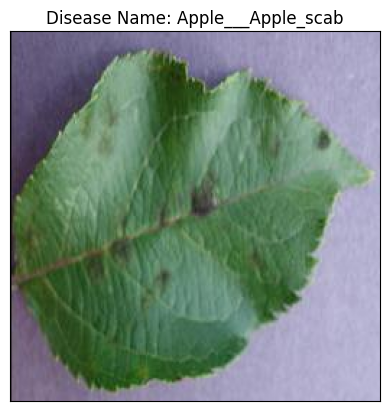

In [8]:
# Displaying the disease prediction
class_name = validation_set.class_names
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [9]:
from PythonGmail import *

In [11]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import img_to_array
import cv2
import matplotlib.pyplot as plt
# from multiprocessing import Process
# from time import sleep


# Function to preprocess and make predictions on the image
def predict_disease(image):
    # Preprocess the image
    image = cv2.resize(image, (128, 128))
    input_arr = img_to_array(image)
    input_arr = np.array([input_arr])

    # Make predictions
    predictions = cnn.predict(input_arr)
    result_index = np.argmax(predictions)

    return result_index

# Open the default camera
cap = cv2.VideoCapture(1)

def auto_email(model_prediction):
        prep_email(model_prediction)
        send_email()

count = 1
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Display the captured frame
    cv2.imshow('Frame', frame)

    # Preprocess and make predictions
    result_index = predict_disease(frame)
    model_prediction = class_name[result_index]

    # Display the prediction
    print("Predicted Disease:", model_prediction)
    
    if count % 300 == 0:
        auto_email(model_prediction)
        count = 1
    count += 1
    print(count)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
        




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Disease: Tomato___Leaf_Mold
2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Disease: Tomato___Leaf_Mold
3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Disease: Tomato___Leaf_Mold
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Disease: Tomato___Leaf_Mold
5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Disease: Tomato___Leaf_Mold
6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Disease: Tomato___Leaf_Mold
7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Disease: Tomato___Leaf_Mold
8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Disease: Tomato___Leaf_Mold
9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Disease: Tomato___Leaf_Mold
10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Disease: Tomato___Leaf_Mold
11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Disease: Tomato___Leaf_Mold
12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Disease: Tomato___Leaf_Mold
13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Disease: Tom